In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1731c2bed80325d860b9f2cb9d5922f4


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [54]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | victoria
Processing Record 3 of Set 1 | pacifica
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | touros
Processing Record 6 of Set 1 | palmer
Processing Record 7 of Set 1 | virginia beach
Processing Record 8 of Set 1 | honningsvag
Processing Record 9 of Set 1 | lampazos de naranjo
Processing Record 10 of Set 1 | amuntai
Processing Record 11 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 12 of Set 1 | qaanaaq
Processing Record 13 of Set 1 | khatanga
Processing Record 14 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | san patricio
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | tsarychanka
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | lagoa
Processing Re

Processing Record 39 of Set 4 | santa rosa
Processing Record 40 of Set 4 | acapulco
Processing Record 41 of Set 4 | komsomolskiy
Processing Record 42 of Set 4 | sao joao do paraiso
Processing Record 43 of Set 4 | severobaykalsk
Processing Record 44 of Set 4 | surt
Processing Record 45 of Set 4 | george
Processing Record 46 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 47 of Set 4 | mandalgovi
Processing Record 48 of Set 4 | kulhudhuffushi
Processing Record 49 of Set 4 | bethel
Processing Record 50 of Set 4 | hirara
Processing Record 1 of Set 5 | beringovskiy
Processing Record 2 of Set 5 | alvorada
Processing Record 3 of Set 5 | isangel
Processing Record 4 of Set 5 | mullaitivu
City not found. Skipping...
Processing Record 5 of Set 5 | yomou
Processing Record 6 of Set 5 | hailar
Processing Record 7 of Set 5 | pilar
Processing Record 8 of Set 5 | samdari
Processing Record 9 of Set 5 | hermanus
Processing Record 10 of Set 5 | khanapur
Processing Record 11 of Se

Processing Record 28 of Set 8 | huambo
Processing Record 29 of Set 8 | dawlatabad
Processing Record 30 of Set 8 | port hedland
Processing Record 31 of Set 8 | bambous virieux
Processing Record 32 of Set 8 | husavik
Processing Record 33 of Set 8 | ganeasa
Processing Record 34 of Set 8 | henties bay
Processing Record 35 of Set 8 | abha
Processing Record 36 of Set 8 | arman
Processing Record 37 of Set 8 | itarema
Processing Record 38 of Set 8 | naze
Processing Record 39 of Set 8 | colesberg
Processing Record 40 of Set 8 | palauig
Processing Record 41 of Set 8 | trinidad
Processing Record 42 of Set 8 | kahului
Processing Record 43 of Set 8 | duncan
Processing Record 44 of Set 8 | lata
Processing Record 45 of Set 8 | burgeo
Processing Record 46 of Set 8 | samusu
City not found. Skipping...
Processing Record 47 of Set 8 | qaqortoq
Processing Record 48 of Set 8 | hidalgotitlan
Processing Record 49 of Set 8 | kodinsk
Processing Record 50 of Set 8 | alihe
Processing Record 1 of Set 9 | pangnirt

Processing Record 18 of Set 12 | porto novo
Processing Record 19 of Set 12 | turukhansk
Processing Record 20 of Set 12 | quang ngai
Processing Record 21 of Set 12 | uruzgan
Processing Record 22 of Set 12 | leshukonskoye
Processing Record 23 of Set 12 | orange cove
Processing Record 24 of Set 12 | zuwarah
Processing Record 25 of Set 12 | yinchuan
Processing Record 26 of Set 12 | nabire
Processing Record 27 of Set 12 | gornopravdinsk
Processing Record 28 of Set 12 | tabou
Processing Record 29 of Set 12 | goderich
Processing Record 30 of Set 12 | reconquista
Processing Record 31 of Set 12 | beira
Processing Record 32 of Set 12 | sisimiut
Processing Record 33 of Set 12 | do rud
City not found. Skipping...
Processing Record 34 of Set 12 | vestmannaeyjar
Processing Record 35 of Set 12 | lavrentiya
Processing Record 36 of Set 12 | pascagoula
Processing Record 37 of Set 12 | luanda
Processing Record 38 of Set 12 | gallup
Processing Record 39 of Set 12 | saint-augustin
Processing Record 40 of S

In [55]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.88,147.33,44.01,64,75,10.29,AU,2020-08-31 23:02:09
1,Victoria,22.29,114.16,84.00,79,4,5.01,HK,2020-08-31 23:03:09
2,Pacifica,37.61,-122.49,73.99,60,40,13.87,US,2020-08-31 23:05:16
3,Mataura,-46.19,168.86,45.00,72,88,11.01,NZ,2020-08-31 23:05:16
4,Touros,-5.20,-35.46,77.00,78,40,9.17,BR,2020-08-31 23:05:16
5,Palmer,42.16,-72.33,71.01,66,100,4.88,US,2020-08-31 23:05:16
6,Virginia Beach,36.85,-75.98,80.01,70,76,1.01,US,2020-08-31 23:05:17
7,Honningsvag,70.98,25.97,49.24,73,100,25.79,NO,2020-08-31 23:05:17
8,Lampazos De Naranjo,27.02,-100.52,101.25,30,0,15.30,MX,2020-08-31 23:05:17
9,Amuntai,-2.42,115.25,74.55,93,100,0.85,ID,2020-08-31 23:05:17


In [56]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.88,147.33,44.01,64,75,10.29,AU,2020-08-31 23:02:09
1,Victoria,22.29,114.16,84.00,79,4,5.01,HK,2020-08-31 23:03:09
2,Pacifica,37.61,-122.49,73.99,60,40,13.87,US,2020-08-31 23:05:16
3,Mataura,-46.19,168.86,45.00,72,88,11.01,NZ,2020-08-31 23:05:16
4,Touros,-5.20,-35.46,77.00,78,40,9.17,BR,2020-08-31 23:05:16
5,Palmer,42.16,-72.33,71.01,66,100,4.88,US,2020-08-31 23:05:16
6,Virginia Beach,36.85,-75.98,80.01,70,76,1.01,US,2020-08-31 23:05:17
7,Honningsvag,70.98,25.97,49.24,73,100,25.79,NO,2020-08-31 23:05:17
8,Lampazos De Naranjo,27.02,-100.52,101.25,30,0,15.30,MX,2020-08-31 23:05:17
9,Amuntai,-2.42,115.25,74.55,93,100,0.85,ID,2020-08-31 23:05:17


In [57]:
city_data_df= city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2020-08-31 23:02:09,-42.88,147.33,44.01,64,75,10.29
1,Victoria,HK,2020-08-31 23:03:09,22.29,114.16,84.00,79,4,5.01
2,Pacifica,US,2020-08-31 23:05:16,37.61,-122.49,73.99,60,40,13.87
3,Mataura,NZ,2020-08-31 23:05:16,-46.19,168.86,45.00,72,88,11.01
4,Touros,BR,2020-08-31 23:05:16,-5.20,-35.46,77.00,78,40,9.17
5,Palmer,US,2020-08-31 23:05:16,42.16,-72.33,71.01,66,100,4.88
6,Virginia Beach,US,2020-08-31 23:05:17,36.85,-75.98,80.01,70,76,1.01
7,Honningsvag,NO,2020-08-31 23:05:17,70.98,25.97,49.24,73,100,25.79
8,Lampazos De Naranjo,MX,2020-08-31 23:05:17,27.02,-100.52,101.25,30,0,15.30
9,Amuntai,ID,2020-08-31 23:05:17,-2.42,115.25,74.55,93,100,0.85


In [58]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [59]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [60]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'08/31/20'

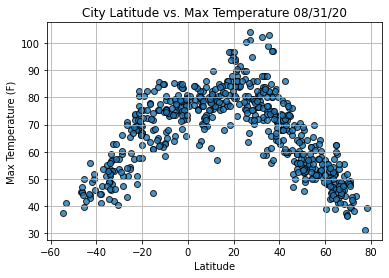

In [61]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

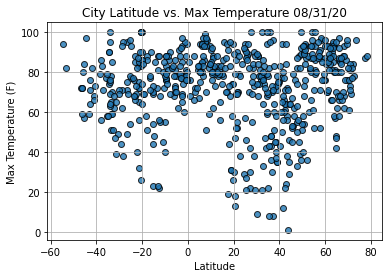

In [62]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

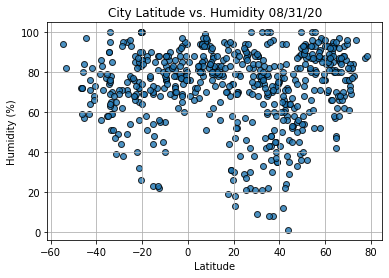

In [63]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

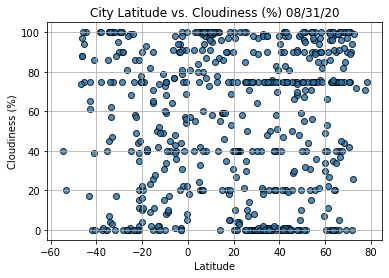

In [64]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

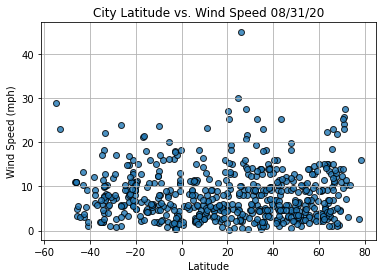

In [65]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [ ]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress
# Import Matplotlib.
import matplotlib.pyplot as plt

In [ ]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [94]:
index13 = city_data_df.loc[13]
index13

City                 San Patricio
Country                        MX
Date          2020-08-31 23:05:18
Lat                         19.22
Lng                        -104.7
Max Temp                       86
Humidity                       74
Cloudiness                     75
Wind Speed                  11.41
Name: 13, dtype: object

In [95]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4      False
       ...  
583    False
584     True
585    False
586     True
587    False
Name: Lat, Length: 588, dtype: bool

In [96]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2020-08-31 23:02:09,-42.88,147.33,44.01,64,75,10.29
1,Victoria,HK,2020-08-31 23:03:09,22.29,114.16,84.00,79,4,5.01
2,Pacifica,US,2020-08-31 23:05:16,37.61,-122.49,73.99,60,40,13.87
3,Mataura,NZ,2020-08-31 23:05:16,-46.19,168.86,45.00,72,88,11.01
4,Touros,BR,2020-08-31 23:05:16,-5.20,-35.46,77.00,78,40,9.17


In [97]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Victoria,HK,2020-08-31 23:03:09,22.29,114.16,84.00,79,4,5.01
2,Pacifica,US,2020-08-31 23:05:16,37.61,-122.49,73.99,60,40,13.87
5,Palmer,US,2020-08-31 23:05:16,42.16,-72.33,71.01,66,100,4.88
6,Virginia Beach,US,2020-08-31 23:05:17,36.85,-75.98,80.01,70,76,1.01
7,Honningsvag,NO,2020-08-31 23:05:17,70.98,25.97,49.24,73,100,25.79


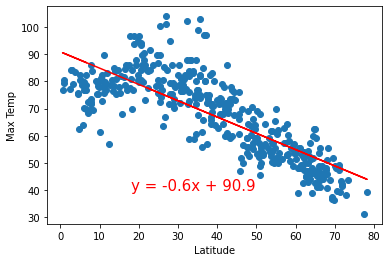

In [114]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 
                       'Max Temp',(18,40))

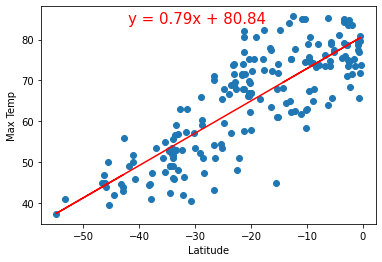

In [115]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature',
                       'Max Temp',(-42,84))

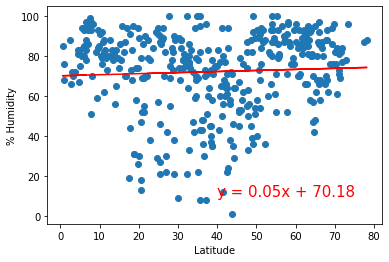

In [117]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity',
                       '% Humidity',(40,10))

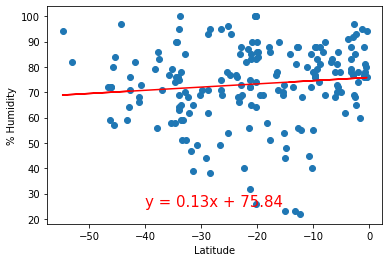

In [124]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity',
                       '% Humidity',(-40,25))

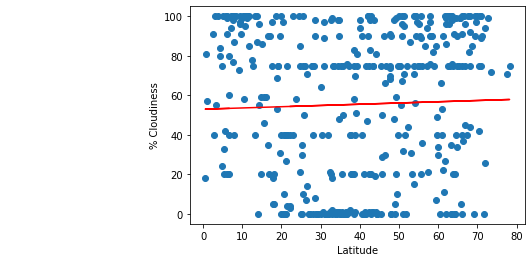

In [125]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness',
                       '% Cloudiness',(-50,60))

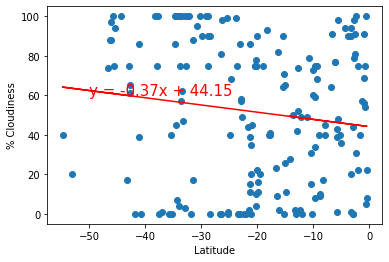

In [126]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness',
                       '% Cloudiness',(-50,60))

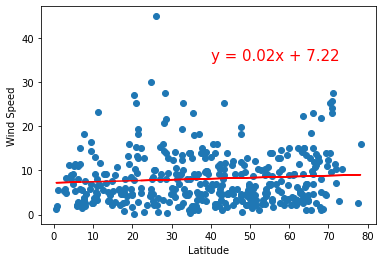

In [128]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

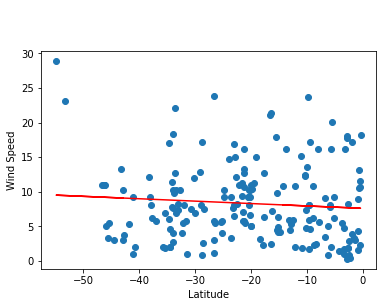

In [130]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))